# DATA CLEANING
A notebook to cleaning the crawled data.

# 1. Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

%matplotlib inline

# 2. Data Cleaning

## 2.1. First quick clean to the raw data

In [2]:
# Load the dataset
df = pd.read_csv('zillow_all.csv',sep=',',
                  error_bad_lines=False,  engine="python")

# Load columns from extra file and merge into the dataset
extra = pd.read_csv('zillow_extra_all.csv',sep=',',
                    error_bad_lines=False,  engine="python")
extra_cols = list(extra.columns)
df.head()

,Unnamed: 0,Unnamed: 0.1,zpid,id,providerListingId,imgSrc,hasImage,detailUrl,statusType,statusText,...,PrimaryBathroom,Unnamed: 0.1.1.1,UtilityRoom,Gym,Workshop,Bathroom1,Bathroom2,Bathroom3,Bedroom1,GuestRoom
0,0,0,2078094339,2078094339,11114313,https://photos.zillowstatic.com/fp/0dce2fd07ff...,TRUE,https://www.zillow.com/homedetails/115-30-116t...,FOR_SALE,House for sale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,32188223,32188223,11106803,https://photos.zillowstatic.com/fp/3bb42d1cf57...,TRUE,https://www.zillow.com/homedetails/13437-155th...,FOR_SALE,House for sale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,32374140,32374140,0,https://photos.zillowstatic.com/fp/09c653225d2...,TRUE,https://www.zillow.com/homedetails/1-Pleasant-...,FOR_SALE,House for sale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,32348107,32348107,0,https://photos.zillowstatic.com/fp/5c129bd75b0...,TRUE,https://www.zillow.com/homedetails/37-David-St...,FOR_SALE,House for sale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,32067835,32067835,1637509,https://photos.zillowstatic.com/fp/a884e367ff1...,TRUE,https://www.zillow.com/homedetails/14121-77th-...,FOR_SALE,House for sale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Length of dataset

In [3]:
# Length of dataset
len(df)

15383

- Quick stats of percentage of null values in columns

In [4]:
nan_value = float("NaN")
df.replace("0", nan_value, inplace=True)
# Quick stats of percentage of null values in columns
(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

GuestRoom                                                         0.999935
Bathroom3                                                         0.999935
Bathroom2                                                         0.999935
Bathroom1                                                         0.999935
Gym                                                               0.999740
                                                                    ...   
homeInfo_open_house_info_open_house_showing_3_open_house_start    0.000000
homeInfo_open_house_info_open_house_showing_3_open_house_end      0.000000
homeInfo_open_house_info_open_house_showing_4_open_house_start    0.000000
homeInfo_open_house_info_open_house_showing_4_open_house_end      0.000000
homeInfo_open_house_info_open_house_showing_5_open_house_start    0.000000
Length: 230, dtype: float64

There are many columns having high percentage of null values

- Drop columns with over 50 % of null values

In [5]:
# Drop columns with over 50% of null values
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [6]:
# Same for numeric columns with too many 0 and -1 values (also null values of numeric columns but turned to 0 and -1 by crawling function)
drop_cols = []
for col in df.columns:
    if (len([x for x in df[col] if (x == 0 or x == -1)]) / len(df)) > 0.5:
        drop_cols.append(col)

df.drop(drop_cols, axis=1, inplace=True)

- Drop duplicate columns

In [7]:
# Drop duplicate columns(same values)
drop_cols = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if df[df.columns[i]].equals(df[df.columns[j]]):
            drop_cols.append(df.columns[j])

df.drop(drop_cols, axis=1, inplace=True)


- Null percentage after dropping

In [8]:
(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

Other financial information    0.366378
Other facts                    0.321654
Flooring                       0.295651
brokerName                     0.288045
Interior Features              0.284080
                                 ...   
homeInfo_latitude              0.000000
homeInfo_longitude             0.000000
Unnamed: 0.1                   0.000000
homeInfo_bathrooms             0.000000
homeInfo_price                 0.000000
Length: 71, dtype: float64

- Considering all columns

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'zpid', 'imgSrc', 'hasImage', 'detailUrl',
       'statusType', 'statusText', 'countryCurrency', 'price',
       'unformattedPrice', 'address', 'addressStreet', 'addressCity',
       'addressState', 'addressZipcode', 'beds', 'baths', 'area', 'latLong',
       'variableData', 'hdpData', 'pgapt', 'sgapt', 'zestimate', 'brokerName',
       'hasAdditionalAttributions', 'list', 'homeInfo_zpid',
       'homeInfo_streetAddress', 'homeInfo_zipcode', 'homeInfo_city',
       'homeInfo_state', 'homeInfo_latitude', 'homeInfo_longitude',
       'homeInfo_price', 'homeInfo_bathrooms', 'homeInfo_bedrooms',
       'homeInfo_livingArea', 'homeInfo_homeType', 'homeInfo_homeStatus',
       'homeInfo_isFeatured', 'homeInfo_rentZestimate',
       'homeInfo_listing_sub_type_is_FSBA', 'homeInfo_isNonOwnerOccupied',
       'homeInfo_isPremierBuilder', 'homeInfo_currency', 'homeInfo_country',
       'homeInfo_lotAreaValue', 'homeInfo_lotAreaUnit', 'homeInfo_zestimate',
    

Picking useable columns:
- Remove same meaning columns
- Pick roughly useful columns (drop image, url... useless information)
- Preserve all columns from the extra file to flatten later

In [10]:
# Remove duplicate columns and pick useful columns (quickly)
# Preserve all columns from extra file
usefull_cols = ['homeInfo_price', 'statusText', 'homeInfo_homeType',
                'brokerName', 'hasAdditionalAttributions', 'homeInfo_city',
                'homeInfo_state', 'homeInfo_latitude', 'homeInfo_longitude',
                'homeInfo_bathrooms', 'homeInfo_bedrooms', 'homeInfo_livingArea',
                'homeInfo_lotAreaValue', 'homeInfo_taxAssessedValue',
                'Bedrooms and bathrooms', 'Other interior features', 'Parking', 
                'Lot', 'Other property information', 'Type and style', 
                'Condition', 'Utility', 'Location', 'Appliances', 'Heating', 
                'Cooling', 'Property', 'Material information', 'Other facts', 
                'Flooring', 'Interior Features', 'Other financial information']

dff = df[usefull_cols]

- Rename columns for easier handling

In [11]:
# Rename columns
dff.rename(columns={'statusText':'status', 'homeInfo_city':'city', 
                    'homeInfo_state':'state', 'homeInfo_latitude': 'latitude',
                    'homeInfo_longitude': 'longitude', 'homeInfo_price': 'price', 
                    'homeInfo_bathrooms': 'bathrooms', 
                    'homeInfo_bedrooms': 'bedrooms', 'brokerName': 'broker_name',
                    'homeInfo_livingArea': 'living_area', 
                    'homeInfo_lotAreaValue':'lot_area', 
                    'homeInfo_taxAssessedValue':'tax_assessed_value', 
                    'homeInfo_homeType':'type',
                    'hasAdditionalAttributions': 'has_add_attributions',
                    },inplace=True)
dff.columns

Index(['price', 'status', 'type', 'broker_name', 'has_add_attributions',
       'city', 'state', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'living_area', 'lot_area', 'tax_assessed_value',
       'Bedrooms and bathrooms', 'Other interior features', 'Parking', 'Lot',
       'Other property information', 'Type and style', 'Condition', 'Utility',
       'Location', 'Appliances', 'Heating', 'Cooling', 'Property',
       'Material information', 'Other facts', 'Flooring', 'Interior Features',
       'Other financial information'],
      dtype='object')

In [12]:
# List of listed-value columns
extra_cols = ['Bedrooms and bathrooms', 'Other interior features', 'Parking', 
              'Lot', 'Other property information', 'Type and style', 'Condition', 
              'Utility', 'Location', 'Appliances', 'Heating', 'Cooling', 
              'Property', 'Material information', 'Other facts', 'Flooring', 
              'Interior Features', 'Other financial information']

In [13]:
len(dff)

15383

In [14]:
dff.head()

,price,status,type,broker_name,has_add_attributions,city,state,latitude,longitude,bathrooms,...,Location,Appliances,Heating,Cooling,Property,Material information,Other facts,Flooring,Interior Features,Other financial information
0,274000,House for sale,SINGLE_FAMILY,Listing by: SOWAE CORP,True,South Ozone Park,NY,40.675730,-73.822350,1,...,['Region: South Ozone Park'],NaN,NaN,NaN,NaN,NaN,"['GarageYN: true', 'HeatingYN: true', 'Basemen...",NaN,NaN,NaN
1,270000,House for sale,SINGLE_FAMILY,Listing by: SOWAE CORP,True,Jamaica,NY,40.670036,-73.780450,2,...,['Region: Jamaica'],"['Appliances included: Microwave, Range / Oven']",NaN,NaN,NaN,NaN,"['Flooring: Tile, Hardwood', 'HeatingYN: true'...","['Flooring: Tile, Hardwood']",NaN,NaN
2,899000,House for sale,SINGLE_FAMILY,Listing by: Comfort Homes Realty Group Inc,True,Staten Island,NY,40.524227,-74.215790,3,...,['Region: Staten Island'],"['Appliances included: Dishwasher, Dryer, Refr...","['Heating features: Hot Water, Natural Gas']",['Cooling features: Units'],"['Levels: 2.0', 'Stories: 2', 'Waterview: None']",NaN,['Listing Agreement: Exclusive Right To Sell'],NaN,NaN,NaN
3,599000,House for sale,SINGLE_FAMILY,"Listing by: Tom Crimmins Realty, Ltd.",True,Staten Island,NY,40.543262,-74.149055,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1390000,House for sale,SINGLE_FAMILY,Listing by: Winzone Realty Inc,True,Flushing,NY,40.721615,-73.820755,4,...,['Region: Flushing'],"['Appliances included: Dryer, Washer']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2. Flatten columns that have listed value

* Define function to flatten each columns from the extra file

In [15]:
# Define flatten function
def flatten_json(nested_json, exclude=['']):
    out = {}
    if type(nested_json) is str:
        lst = nested_json[1:-1].split(", ")
        for ex in lst:
            try:
                idx = ex.index(":")
                start = ex.index("\'")
            except:
                continue
            try:
                out[ex[start+1:idx]] = float(ex[idx+2:-1])
            except:
                out[ex[start+1:idx]] = ex[idx+2:-1]
    return out

Flatten strategy:
- Flatten columns that have list value type
- Check the null percentage of the new column and drop if it is > 50%
- Check duplicate and same meaning columns
- Only keep columns that have useful information and different from previous columns  

In [16]:
# Flatten 'Bedrooms and bathrooms'
A = pd.DataFrame([flatten_json(x) for x in dff['Bedrooms and bathrooms']])
A.head()

,Bedrooms,Bathrooms,Full bathrooms,3/4 bathrooms,1/2 bathrooms,1/4 bathrooms,Main level bathrooms,Main level bedrooms,Partial bathrooms
0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN


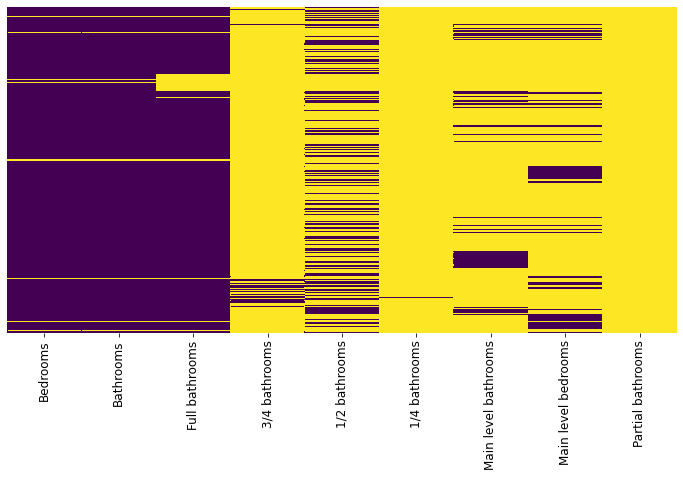

In [17]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(A.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [18]:
(A.isnull().sum() / A.isnull().count()).sort_values(ascending=False)

Partial bathrooms       0.999935
1/4 bathrooms           0.998375
3/4 bathrooms           0.943639
Main level bathrooms    0.856010
Main level bedrooms     0.825717
1/2 bathrooms           0.599233
Full bathrooms          0.093285
Bedrooms                0.034844
Bathrooms               0.034714
dtype: float64

In [19]:
# Concat useful and non-duplicate column
dff = pd.concat([dff,A["Full bathrooms"]], axis=1)

In [20]:
# Flatten 'Other interior features'
B = pd.DataFrame([flatten_json(x) for x in dff['Other interior features']])
B.head()

,Total interior livable area,Total structure area,Common walls with other units/homes,Virtual tour,Attic,Fireplace features,Fireplace,Total number of fireplaces,Furnished,Finished area below ground,Finished area above ground,
0,"1,556 sqft",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,920 sqft",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,532 sqft","2,532",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1,915 sqft",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


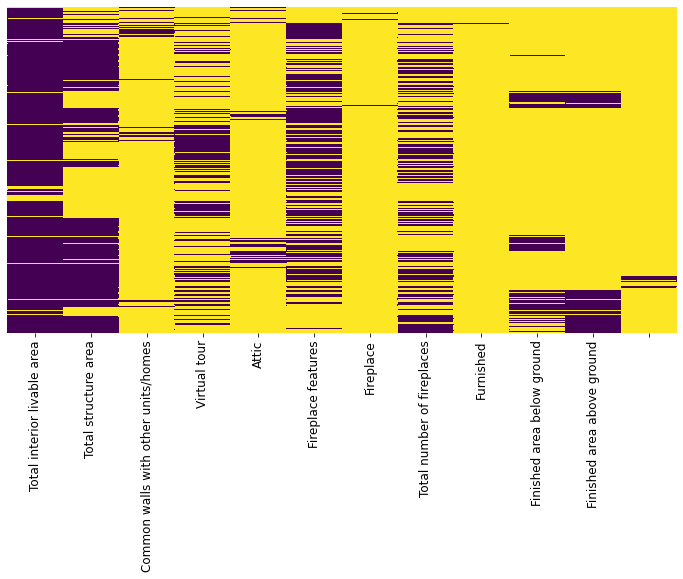

In [21]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(B.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [22]:
(B.isnull().sum() / B.isnull().count()).sort_values(ascending=False)

Furnished                              0.997595
Fireplace                              0.983228
                                       0.974777
Common walls with other units/homes    0.929468
Attic                                  0.905740
Finished area above ground             0.827862
Finished area below ground             0.827147
Virtual tour                           0.627901
Total number of fireplaces             0.608984
Fireplace features                     0.479165
Total structure area                   0.390366
Total interior livable area            0.080153
dtype: float64

Considering same meaning columns "Fireplace feature" and "Total number of fireplaces"

In [23]:
B['Fireplace features'].unique()

array([nan, 'Pellet Stove', 'Wood Burning Stove', 'Family Room',
       'Living Room', 'Non', 'Decorative', 'Dining Roo', 'None',
       'Living Roo', 'Family Roo', 'Other', 'Wood Burning', 'De',
       'Great Roo', 'Outsid', 'See Remarks', 'Fire Pi', 'Decorativ',
       'Master Bedroo', 'Great Room', 'Gas', 'Pati', 'Gas Starte',
       'Gas and Woo', 'Guest Hous', 'Electric', 'Fire Pit', 'Ga',
       'Bonus Roo', 'Raised Heart', 'Bat', 'Librar', 'Electri', 'Kitche',
       'Master Bedroom', 'Master Retrea', 'Othe', 'Den', 'Wood Burnin',
       'Outside', 'Dining Room', 'Game Roo', 'Gas Lo', 'Double Side',
       'Heatilato', 'Basement', 'Loft', 'Ventles',
       'Attached Fireplace Doors/Scree', 'Gas Log', 'Free Standing',
       'Free Standin', '1 Fireplac', '1 Fireplace', '2 Fireplac',
       '3+ Fireplac', 'Other (See Remarks)', '2 Fireplace',
       '3+ Fireplace', 'See Through', 'Gas/Propane', 'Corne', 'Bric',
       'Marble', 'Ston', 'Brick', 'Stone', 'Marbl', 'Gas/Propan',
    

In [24]:
B['Total number of fireplaces'].unique()

array([nan,  1.,  2.,  3.,  6.,  5.,  8.,  7.,  4., 13.,  9., 10.])

In [25]:
# Getting information from 2 same meaning columns into 1 column
for i in range(len(B)):
    if B['Total number of fireplaces'][i] not in np.array([1,2,3,4,5,6,7,8,9,10,13], dtype=np.float64):
        B['Total number of fireplaces'][i] = B['Fireplace features'][i]

In [26]:
(B.isnull().sum() / B.isnull().count()).sort_values(ascending=False)

Furnished                              0.997595
Fireplace                              0.983228
                                       0.974777
Common walls with other units/homes    0.929468
Attic                                  0.905740
Finished area above ground             0.827862
Finished area below ground             0.827147
Virtual tour                           0.627901
Fireplace features                     0.479165
Total number of fireplaces             0.425210
Total structure area                   0.390366
Total interior livable area            0.080153
dtype: float64

In [27]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, B["Total number of fireplaces"]], axis=1)

In [28]:
# Flatten 'Parking'
C = pd.DataFrame([flatten_json(x) for x in dff['Parking']])
C.head()

,Parking features,Total spaces,Garage spaces,Has uncovered spaces,Carport,Has garage,Covered spaces,Uncovered spaces,Carport spaces,Other parking information,
0,Garage - Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Detache,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


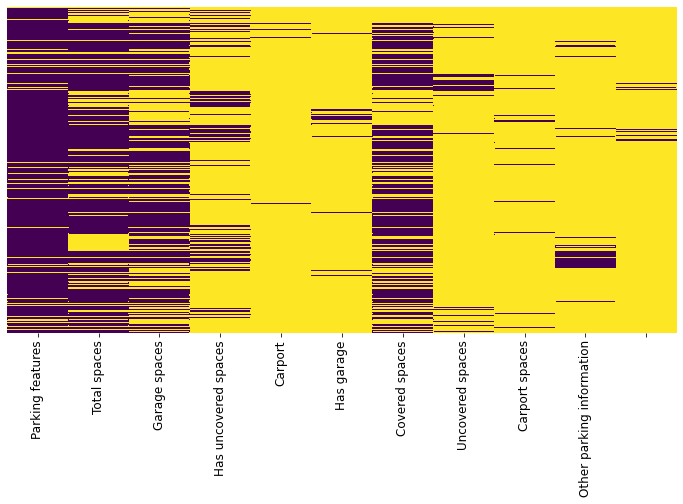

In [29]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(C.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [30]:
(C.isnull().sum() / C.isnull().count()).sort_values(ascending=False)

Carport                      0.991224
                             0.978223
Has garage                   0.958851
Carport spaces               0.947344
Other parking information    0.928492
Uncovered spaces             0.911916
Has uncovered spaces         0.795619
Garage spaces                0.394331
Covered spaces               0.376845
Total spaces                 0.280699
Parking features             0.095820
dtype: float64

In [31]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, C["Parking features"]], axis=1)
dff = pd.concat([dff, C["Covered spaces"]], axis=1)
dff = pd.concat([dff, C["Garage spaces"]], axis=1)
dff = pd.concat([dff, C["Total spaces"]], axis=1)

In [32]:
# Flatten 'Lot'
D = pd.DataFrame([flatten_json(x) for x in dff['Lot']])
D.head()

,Lot size,Lot size dimensions,Lot features,
0,"2,400 sqft",NaN,NaN,NaN
1,"3,998 sqft",NaN,NaN,NaN
2,"6,903 sqft",59 x 117,NaN,NaN
3,NaN,NaN,NaN,NaN
4,"2,697 sqft",NaN,NaN,NaN


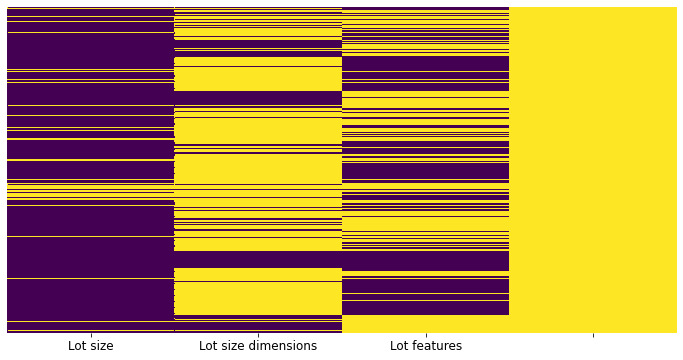

In [33]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(D.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [34]:
(D.isnull().sum() / D.isnull().count()).sort_values(ascending=False)

                       0.996360
Lot size dimensions    0.707989
Lot features           0.457973
Lot size               0.105246
dtype: float64

In [35]:
dff = pd.concat([dff, D["Lot features"]], axis=1)

In [36]:
# Flatten 'Other property information'
E = pd.DataFrame([flatten_json(x) for x in dff['Other property information']])
E.head()

,Lease amount,Special conditions,Parcel number,Zoning,Inclusions,,Zoning description,Additional structures included,Attached to another structure,Other equipment,Exclusions,Additional parcel(s) included,Raise horse,On leased land,Horse amenities
0,$0,Short Sale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$0,Short Sale,122940051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,07495-0001,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,66060137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


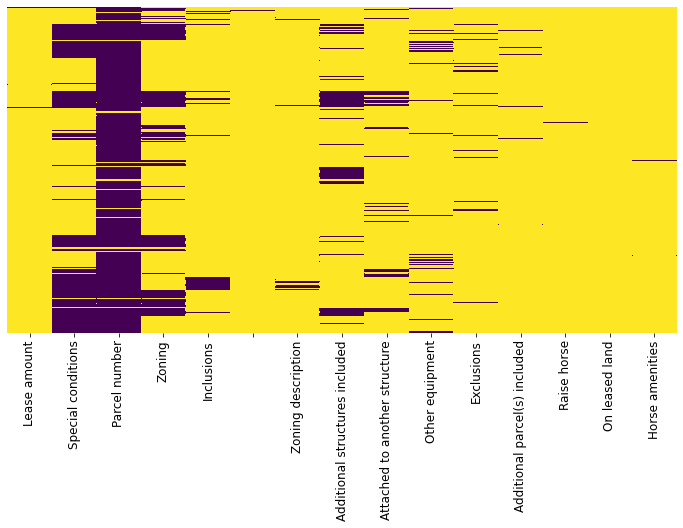

In [37]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(E.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [38]:
# Cannot use any of these columns
(E.isnull().sum() / E.isnull().count()).sort_values(ascending=False)

On leased land                    0.999025
Horse amenities                   0.998830
Raise horse                       0.997010
Additional parcel(s) included     0.992199
Lease amount                      0.991419
                                  0.991224
Zoning description                0.966977
Exclusions                        0.944354
Inclusions                        0.931678
Other equipment                   0.919457
Attached to another structure     0.917766
Additional structures included    0.777807
Zoning                            0.715725
Special conditions                0.584346
Parcel number                     0.057661
dtype: float64

In [39]:
# Flatten 'Type and style'
F = pd.DataFrame([flatten_json(x) for x in dff['Type and style']])
F.head()

,Home type,Architectural style,Property subType
0,SingleFamily,NaN,NaN
1,SingleFamily,NaN,NaN
2,SingleFamily,Colonial,Single Family - Detached
3,NaN,NaN,NaN
4,SingleFamily,NaN,NaN


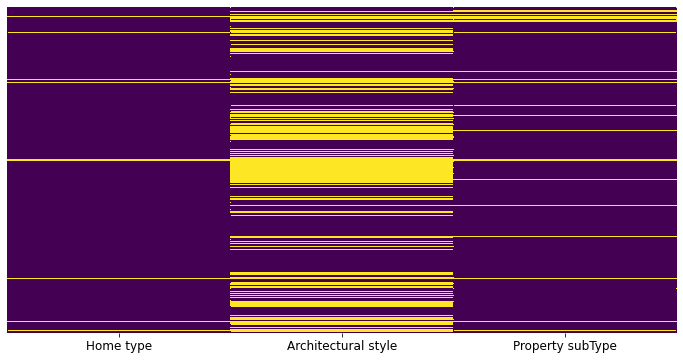

In [40]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(F.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [41]:
(F.isnull().sum() / F.isnull().count()).sort_values(ascending=False)

Architectural style    0.406163
Property subType       0.071833
Home type              0.034584
dtype: float64

In [42]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, F["Property subType"]], axis=1)
dff = pd.concat([dff, F["Architectural style"]], axis=1)

In [43]:
# Flatten 'Condition'
G = pd.DataFrame([flatten_json(x) for x in dff['Condition']])
G.head()

,New construction,Year built,Property condition
0,No,1930.0,NaN
1,No,1950.0,NaN
2,No,1899.0,"Existing,Excellent"
3,NaN,NaN,NaN
4,No,1945.0,NaN


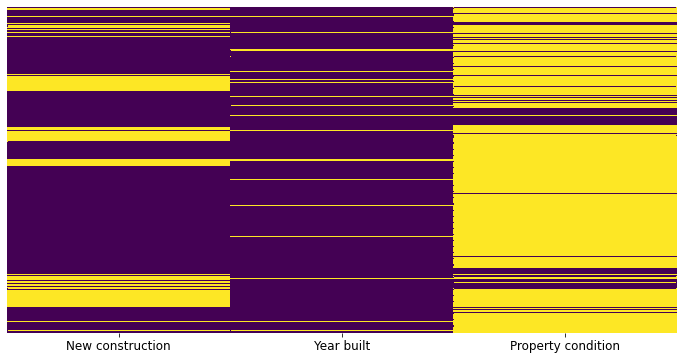

In [44]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(G.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [45]:
(G.isnull().sum() / G.isnull().count()).sort_values(ascending=False)

Property condition    0.828512
New construction      0.270558
Year built            0.052981
dtype: float64

In [46]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, G["Year built"]], axis=1)

In [47]:
# Flatten 'Utility'
H = pd.DataFrame([flatten_json(x) for x in dff['Utility']])
H.head()

,Electric information,Sewer information,Water information,Utilities for property,Electric utility on property,Gas information,
0,Amps(0),NaN,NaN,NaN,NaN,NaN,NaN
1,Amps(0),NaN,NaN,NaN,NaN,NaN,NaN
2,220 Volts,Public Sewer,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


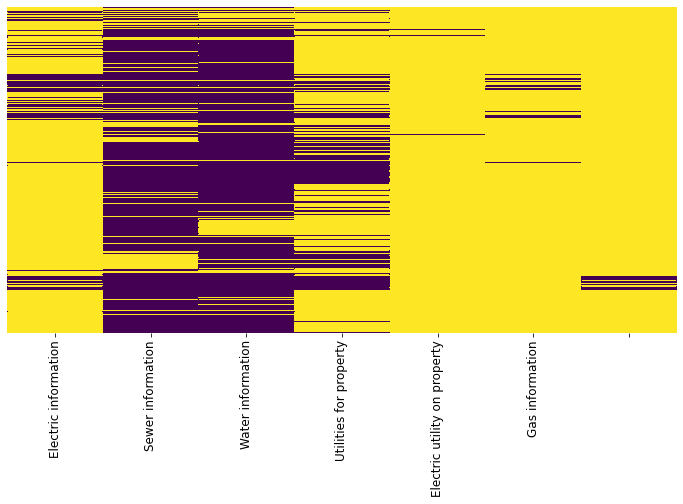

In [48]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(H.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [49]:
(H.isnull().sum() / H.isnull().count()).sort_values(ascending=False)

Electric utility on property    0.983748
                                0.967757
Gas information                 0.951830
Electric information            0.821296
Utilities for property          0.636417
Sewer information               0.219138
Water information               0.190730
dtype: float64

In [50]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, H["Sewer information"]], axis=1)
dff = pd.concat([dff, H["Water information"]], axis=1)

In [51]:
# Flatten 'Location'
I = pd.DataFrame([flatten_json(x) for x in dff['Location']])
I.head()

,Region,Subdivision,,Municipality
0,South Ozone Park,NaN,NaN,NaN
1,Jamaica,NaN,NaN,NaN
2,Staten Island,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Flushing,NaN,NaN,NaN


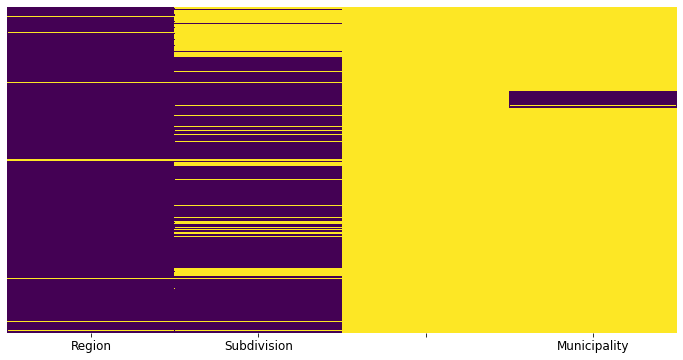

In [52]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(I.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [53]:
I['Subdivision'].unique() #Same as cities

array([nan, 'Staten Island', 'Brooklyn', ..., 'Casper Zopfi Place',
       'Cahal Cottages', 'West End'], dtype=object)

In [54]:
# Cannot use any of these columns
(I.isnull().sum() / I.isnull().count()).sort_values(ascending=False)

                0.998440
Municipality    0.951375
Subdivision     0.271924
Region          0.034454
dtype: float64

In [55]:
# Flatten 'Appliances'
J = pd.DataFrame([flatten_json(x) for x in dff['Appliances']])
J.head()

,Appliances included,Laundry features,
0,NaN,NaN,NaN
1,Microwav,NaN,NaN
2,Dishwashe,NaN,NaN
3,NaN,NaN,NaN
4,Drye,NaN,NaN


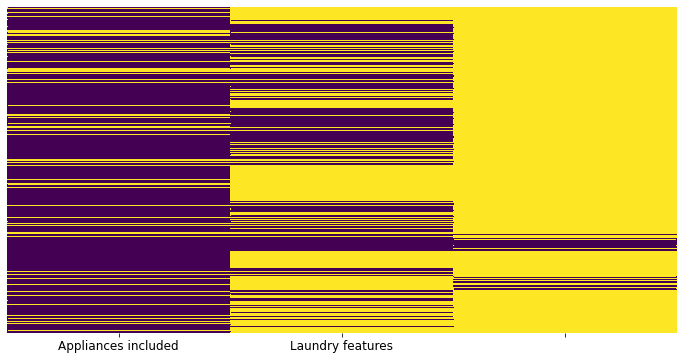

In [56]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(J.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [57]:
(J.isnull().sum() / J.isnull().count()).sort_values(ascending=False)

                       0.933498
Laundry features       0.522785
Appliances included    0.172268
dtype: float64

In [58]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, J["Appliances included"]], axis=1)

In [59]:
# Flatten 'Heating'
K = pd.DataFrame([flatten_json(x) for x in dff['Heating']])
K.head()

,Heating features
0,NaN
1,NaN
2,Hot Wate
3,NaN
4,NaN


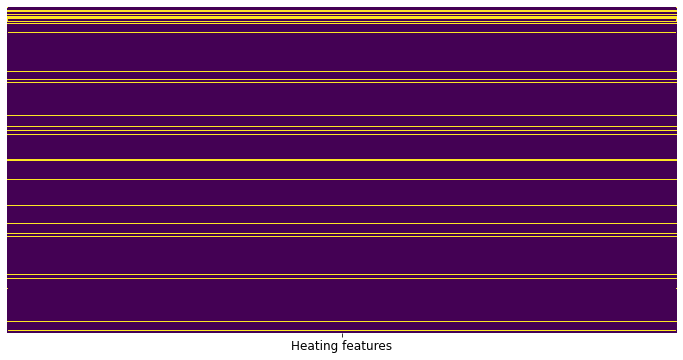

In [60]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(K.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [61]:
(K.isnull().sum() / K.isnull().count()).sort_values(ascending=False)

Heating features    0.087239
dtype: float64

In [62]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, K["Heating features"]], axis=1)

In [63]:
# Flatten 'Cooling'
L = pd.DataFrame([flatten_json(x) for x in dff['Cooling']])
L.head()

,Cooling features,Has cooling
0,NaN,NaN
1,NaN,NaN
2,Units,NaN
3,NaN,NaN
4,NaN,NaN


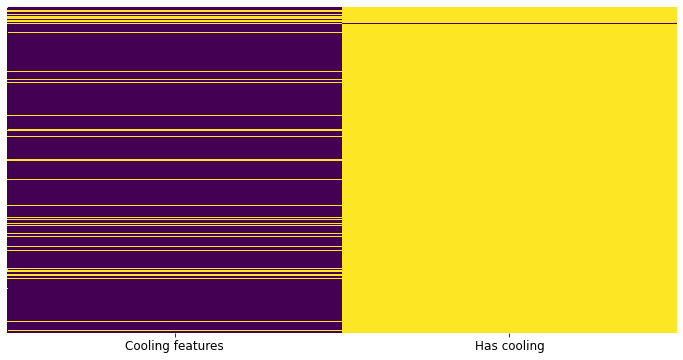

In [64]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(L.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [65]:
(L.isnull().sum() / L.isnull().count()).sort_values(ascending=False)

Has cooling         0.998310
Cooling features    0.094845
dtype: float64

In [66]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, L["Cooling features"]], axis=1)

In [67]:
# Flatten 'Property'
M = pd.DataFrame([flatten_json(x) for x in dff['Property']])
M.head()

,Levels,Stories,Waterview,Exterior features,View description,Waterfront features,Patio and porch details,Fencing,Private pool,Pool features,...,Spa features,Entry location,Horses can be raised,Frontage type,Residential vegetation,Frontage length,Waterbody name,Topography of land,Living area range,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


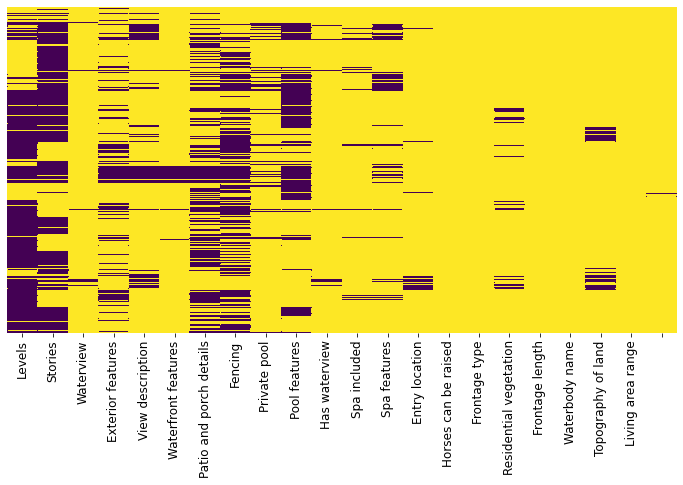

In [68]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(M.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [69]:
(M.isnull().sum() / M.isnull().count()).sort_values(ascending=False)

Frontage length            0.997920
Frontage type              0.997400
Horses can be raised       0.997010
                           0.996490
Waterbody name             0.996100
Living area range          0.991809
Has waterview              0.960216
Entry location             0.955405
Waterview                  0.955275
Residential vegetation     0.942079
Spa included               0.941754
Waterfront features        0.932263
Topography of land         0.926217
Private pool               0.871482
Spa features               0.851589
View description           0.791653
Exterior features          0.710525
Pool features              0.596048
Fencing                    0.528050
Patio and porch details    0.526620
Stories                    0.374894
Levels                     0.328675
dtype: float64

Checking two same meaning columns: "Stories" and "Levels"

In [70]:
M["Stories"].unique()

array([nan,  2.,  3.,  1.,  5.,  4.,  6.,  7.])

In [71]:
M['Levels'].unique()

array([nan, 2.0, 'Three Or More', 'Two', 3.0, 1.0, 'Multi/Split', 'One',
       4.0, 'Ground Level', 'One,Two', 'Multi/Split,Two',
       'Three Or More,Multi/Split', 'Ground Level,One',
       'One,Three Or More', 'Multi/Split,Three Or More',
       'One,Two,Ground Level', 'Split Level', 'Multi/Split,Split Level',
       'All Levels', 'Three', 'Split Level,One and One Half',
       'One and One Half', 2.5, 'Split Level,Four', 'Three and One Half',
       'Split Level,Three', 'Split Foyer,Two', 'Bi-level,Two', 'Six',
       'Split Level,Two', 'Four', 'Split Level,2.5', 'Bi-level,Three',
       'Bi-level,Split Level,Two', 'Bi-level,One and One Half', 'Seven',
       'Bi-level,2.5', 'One,Multi/Split', 'One,Other', 'Two,Multi/Split',
       '3 Story', 'Other/Remarks', 'One Story', 'Two Story',
       'Split Level,Tri-Level', '2 Story,Split', 'Tri-Level',
       'Multi-Level', 'Split', 'Single Story', '2 1/2 Story',
       'Multi/Split,Bi-Level,Split-Level', '2 Story',
       '2 story + ba

In [72]:
for i in range(len(M)):
    if M["Stories"][i] not in np.array([1,2,3,4,5,6,7], dtype=np.float64):
        M["Stories"][i] = M["Levels"][i]

In [73]:
M['Stories'].unique()

array([nan, 2.0, 3.0, 1.0, 5.0, 'Multi/Split', 4.0, 'Two',
       'Three Or More,Multi/Split', 'One', 'Three Or More', 6.0, 7.0,
       'Other/Remarks', 'One and One Half', 'Split Level',
       'Split Level,Tri-Level', 'Tri-Level', 'Single Story', '2 Story',
       '2 story + basement', 'Two Story/Basement', 'Three Story',
       'One Story Basement', 'Three Story/Basement', 'One Story/F.R.O.G.',
       'Two and a Half Story/Basement', 'One and a Half Story/Basement',
       'Three or More Stories,Three Or More', 'Three or More Stories',
       'Other', 'Bi-Level'], dtype=object)

In [74]:
(M.isnull().sum() / M.isnull().count()).sort_values(ascending=False)

Frontage length            0.997920
Frontage type              0.997400
Horses can be raised       0.997010
                           0.996490
Waterbody name             0.996100
Living area range          0.991809
Has waterview              0.960216
Entry location             0.955405
Waterview                  0.955275
Residential vegetation     0.942079
Spa included               0.941754
Waterfront features        0.932263
Topography of land         0.926217
Private pool               0.871482
Spa features               0.851589
View description           0.791653
Exterior features          0.710525
Pool features              0.596048
Fencing                    0.528050
Patio and porch details    0.526620
Levels                     0.328675
Stories                    0.147565
dtype: float64

In [75]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, M["Stories"]], axis=1)

In [76]:
# Flatten 'Material information'
N = pd.DataFrame([flatten_json(x) for x in dff['Material information']])
N.head()

,Construction materials,Roof,Foundation
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


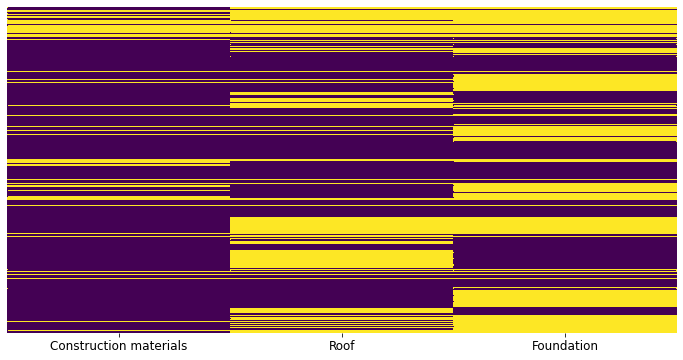

In [77]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(N.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [78]:
(N.isnull().sum() / N.isnull().count()).sort_values(ascending=False)

Foundation                0.491127
Roof                      0.377495
Construction materials    0.185464
dtype: float64

In [79]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, N["Construction materials"]], axis=1)
dff = pd.concat([dff, N["Roof"]], axis=1)
dff = pd.concat([dff, N["Foundation"]], axis=1)

In [80]:
# Flatten 'Other facts'
O = pd.DataFrame([flatten_json(x) for x in dff['Other facts']])
O.head()

,GarageYN,HeatingYN,Basement,Furnished,SpecialListingConditions,ParkingFeatures,YearBuiltEffective,CoveredSpaces,LandLeaseAmount,MlsStatus,...,Road Frontage,Driveway Type,Subdivision Y/N,Total Rooms,Bath 1 Level,Semi-Annual Taxes,Living Room,Additional Rooms,Floor Covering,Lot Features
0,true,true,Full,Unfurnished,Short Sale,Detached,0.0,0.0,0.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,true,NaN,Unfurnished,Short Sale,NaN,0.0,0.0,0.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Cannot use any of these columns
(O.isnull().sum() / O.isnull().count()).sort_values(ascending=False)

Lot Features         0.999935
State                0.999935
Interior             0.999935
Listoffice State     0.999935
Bonus Room           0.999935
                       ...   
Price Range          0.865501
Road surface type    0.824547
Listing Agreement    0.808165
Ownership            0.726906
Listing Terms        0.579796
Length: 245, dtype: float64

In [82]:
# Flatten 'Flooring'
P = pd.DataFrame([flatten_json(x) for x in dff['Flooring']])
P.head()

,Flooring
0,NaN
1,Til
2,NaN
3,NaN
4,NaN


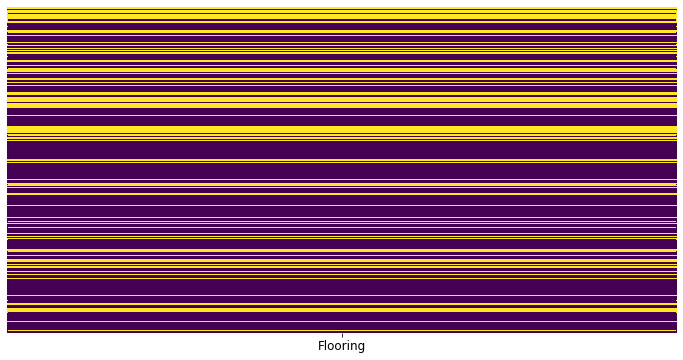

In [83]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(P.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [84]:
(P.isnull().sum() / P.isnull().count()).sort_values(ascending=False)

Flooring    0.295651
dtype: float64

In [85]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, P["Flooring"]], axis=1)

In [86]:
# Flatten 'Interior Features'
Q = pd.DataFrame([flatten_json(x) for x in dff['Interior Features']])
Q.head()

,Interior features,Window features,Door features,
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


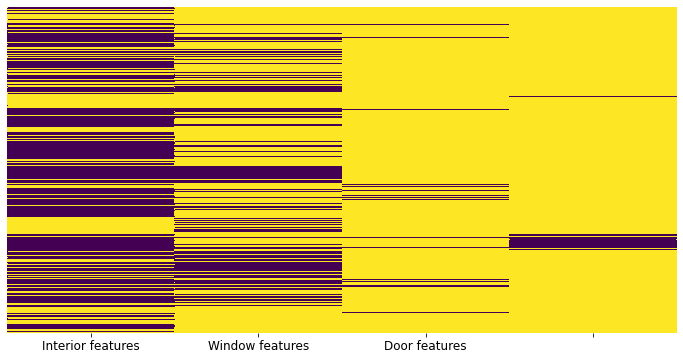

In [87]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(Q.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [88]:
(Q.isnull().sum() / Q.isnull().count()).sort_values(ascending=False)

                     0.958396
Door features        0.946564
Window features      0.650783
Interior features    0.340051
dtype: float64

In [89]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, Q["Interior features"]], axis=1)

In [90]:
# Flatten 'Other financial information'
R = pd.DataFrame([flatten_json(x) for x in dff['Other financial information']])
R.head()

,Buyer agency compensation,,Total actual rent,Additional fee information
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


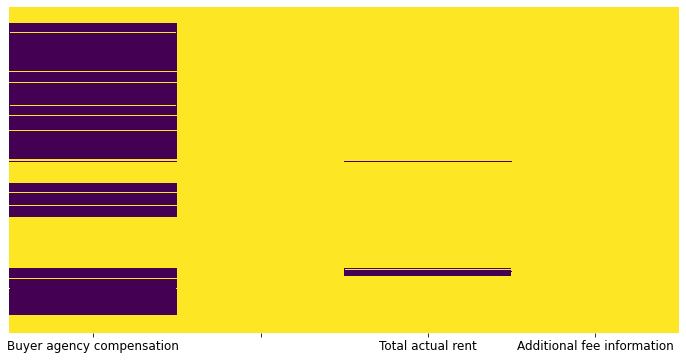

In [91]:
# Checking null values percentage
plt.figure(figsize=(12,6))
msno = sns.heatmap(R.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [92]:
(R.isnull().sum() / R.isnull().count()).sort_values(ascending=False)

                              0.999805
Additional fee information    0.999610
Total actual rent             0.983098
Buyer agency compensation     0.366573
dtype: float64

In [93]:
# Concat useful and non-duplicate column
dff = pd.concat([dff, R["Buyer agency compensation"]], axis=1)

## 2.3. Preparing data for next steps

- Delete all listed value columns

In [94]:
dff.drop(extra_cols, axis = 1, inplace=True)

- Check if new flattened numeric columns have too many 0 values (>50%). If yes, drop it.

In [95]:
extra_cols = ['Full bathrooms', 'Total number of fireplaces', 'Parking features',
              'Covered spaces', 'Garage spaces', 'Total spaces', 'Lot features',
              'Property subType', 'Year built', 'Architectural style', 
              'Sewer information', 'Water information', 'Appliances included', 
              'Heating features', 'Cooling features', 'Construction materials', 
              'Stories', 'Roof', 'Foundation', 'Interior features', 'Buyer agency compensation']

In [96]:
# Delete bad records from the extra file
dff.dropna(axis=0, thresh=len(extra_cols)*0.1, subset=extra_cols, inplace = True)

In [97]:
# Same for records with too many 0 values
length = len(df)
drop_ids = []
for i in range(length):
    count = 0
    for x in dff.columns:
        try: 
            if dff[x][i] == 0:
                count +=1
        except:
            pass
    if count/len(dff.columns) > 0.1:
        drop_ids.append(i)

dff.drop(drop_ids, axis=0, inplace=True)

- Rename new columns

In [98]:
dff.columns

Index(['price', 'status', 'type', 'broker_name', 'has_add_attributions',
       'city', 'state', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'living_area', 'lot_area', 'tax_assessed_value', 'Full bathrooms',
       'Total number of fireplaces', 'Parking features', 'Covered spaces',
       'Garage spaces', 'Total spaces', 'Lot features', 'Property subType',
       'Architectural style', 'Year built', 'Sewer information',
       'Water information', 'Appliances included', 'Heating features',
       'Cooling features', 'Stories', 'Construction materials', 'Roof',
       'Foundation', 'Interior features', 'Buyer agency compensation'],
      dtype='object')

In [99]:
# Rename columns
dff.rename(columns={'Full bathrooms': 'full_bathrooms',
                    'Total number of fireplaces': 'num_fireplaces', 
                    'Parking features':"parking",
                    'Covered spaces': 'covered_spaces',
                    'Garage spaces': 'garage_spaces',
                    'Total spaces': 'total_spaces',
                    'Lot features': 'lot_features',
                    'Property subType': 'subtype', 'Year built':'year_built',
                    'Architectural style': 'architectural_style', 
                    'Sewer information': 'sewer_info', 
                    'Water information': 'water_info', 
                    'Appliances included':'appliances', 
                    'Heating features':'heating', 'Cooling features':'cooling', 
                    'Construction materials': 'materials', 'Stories': 'stories',
                    'Roof': 'roof', 'Foundation': 'foundation', 
                    'Interior features': 'interior_features',
                    'Buyer agency compensation': 'compensation'},inplace=True)
dff.columns

Index(['price', 'status', 'type', 'broker_name', 'has_add_attributions',
       'city', 'state', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'living_area', 'lot_area', 'tax_assessed_value', 'full_bathrooms',
       'num_fireplaces', 'parking', 'covered_spaces', 'garage_spaces',
       'total_spaces', 'lot_features', 'subtype', 'architectural_style',
       'year_built', 'sewer_info', 'water_info', 'appliances', 'heating',
       'cooling', 'stories', 'materials', 'roof', 'foundation',
       'interior_features', 'compensation'],
      dtype='object')

- Our data after the cleaning step

In [100]:
dff.head()

,price,status,type,broker_name,has_add_attributions,city,state,latitude,longitude,bathrooms,...,water_info,appliances,heating,cooling,stories,materials,roof,foundation,interior_features,compensation
0,274000,House for sale,SINGLE_FAMILY,Listing by: SOWAE CORP,True,South Ozone Park,NY,40.675730,-73.822350,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,270000,House for sale,SINGLE_FAMILY,Listing by: SOWAE CORP,True,Jamaica,NY,40.670036,-73.780450,2,...,NaN,Microwav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,899000,House for sale,SINGLE_FAMILY,Listing by: Comfort Homes Realty Group Inc,True,Staten Island,NY,40.524227,-74.215790,3,...,NaN,Dishwashe,Hot Wate,Units,2.0,NaN,NaN,NaN,NaN,NaN
4,1390000,House for sale,SINGLE_FAMILY,Listing by: Winzone Realty Inc,True,Flushing,NY,40.721615,-73.820755,4,...,NaN,Drye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1390000,House for sale,SINGLE_FAMILY,Listing by: Winzone Realty Inc,True,Flushing,NY,40.721615,-73.820755,4,...,Public,NaN,Natural Ga,Wall Unit(s),3.0,Fram,NaN,NaN,Eat-in Kitche,NaN


In [101]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13701 entries, 0 to 14421
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 13701 non-null  int64  
 1   status                13701 non-null  object 
 2   type                  13701 non-null  object 
 3   broker_name           10370 non-null  object 
 4   has_add_attributions  13701 non-null  bool   
 5   city                  13701 non-null  object 
 6   state                 13701 non-null  object 
 7   latitude              13701 non-null  float64
 8   longitude             13701 non-null  float64
 9   bathrooms             13701 non-null  int64  
 10  bedrooms              13701 non-null  int64  
 11  living_area           13701 non-null  int64  
 12  lot_area              13701 non-null  float64
 13  tax_assessed_value    13701 non-null  int64  
 14  full_bathrooms        12810 non-null  float64
 15  num_fireplaces     

Problems:
- Null values (also the zero values in numeric columns)
- Object data type

In [102]:
dff.to_csv("zillow_cleaned.csv", index = False)